In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score

In [68]:
from sklearn.datasets import make_moons

In [69]:
x,y=make_moons(n_samples=300,noise=0.05)
df={"d1":x[:,0],"d2":x[:,1]} # d1 as frst row and d2 has 2 nd row
ds=pd.DataFrame(df)
ds.head()

,d1,d2
0,0.452885,0.939293
1,-1.061179,0.030745
2,0.476989,-0.344384
3,1.410149,-0.386883
4,-0.489806,0.872911


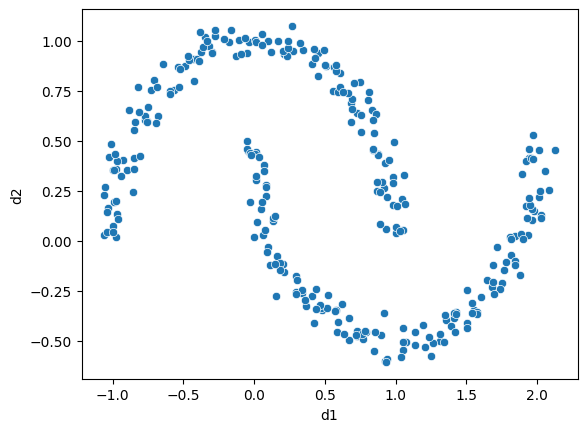

In [70]:
sb.scatterplot(x=ds["d1"],y=ds["d2"])
mat.show()

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
db=DBSCAN(eps=0.2,min_samples=5)
ds["predict"]=db.fit_predict(ds)

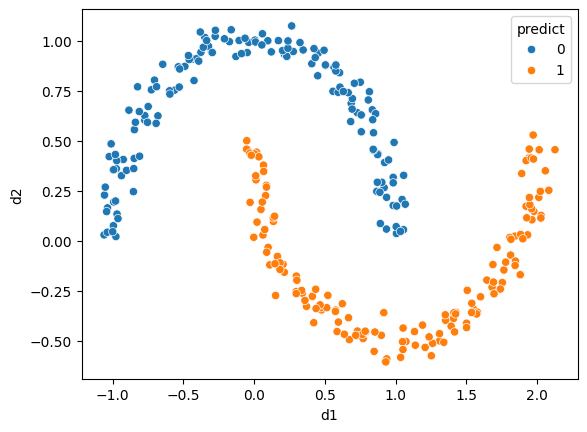

In [73]:
sb.scatterplot(x=ds["d1"],y=ds["d2"],hue=ds["predict"])
mat.show()

K Means

In [74]:
from sklearn.cluster import KMeans,kmeans_plusplus

In [88]:
wcss=[]
df1=ds.drop("predict",axis=1)
for i in range(2,21):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(df1)
    wcss.append(km.inertia_)
wcss

[220.00557673018673,
 148.57954631474615,
 66.02407600026554,
 44.52416664871663,
 30.072677084556673,
 22.1308588789392,
 17.83186460591264,
 16.3442885558516,
 11.111568989160048,
 9.855067062647421,
 7.645631958575955,
 6.417132870772462,
 5.985393847531297,
 5.449111530090234,
 4.9159240409720955,
 4.189661937484457,
 3.7896204673797014,
 3.59734752831402,
 3.4904124342387943]

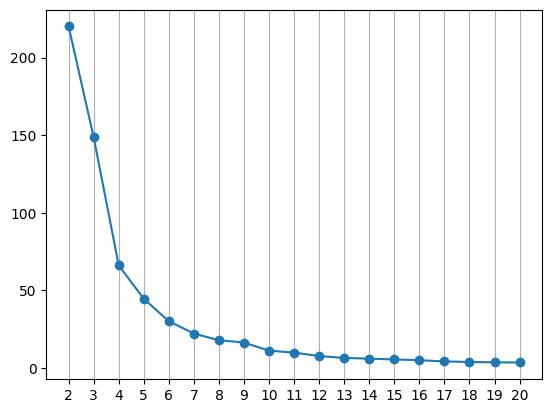

In [89]:
mat.plot([i for i in range(2,21)],wcss,marker="o")
mat.grid(axis="x")
mat.xticks([i for i in range(2,21)])#becuase the x axis values are in decimal thats y to bring it to natural number
mat.show()

In [90]:
kmn=KMeans(n_clusters=3)
ds["Predict"]=kmn.fit_predict(ds)
ds

,d1,d2,predict,Predict
0,0.452885,0.939293,0,0
1,-1.061179,0.030745,0,0
2,0.476989,-0.344384,1,1
3,1.410149,-0.386883,1,1
4,-0.489806,0.872911,0,0
...,...,...,...,...
295,-0.089541,0.936412,0,0
296,-0.809937,0.423812,0,0
297,-0.028543,0.193277,1,1
298,-0.595630,0.734421,0,0


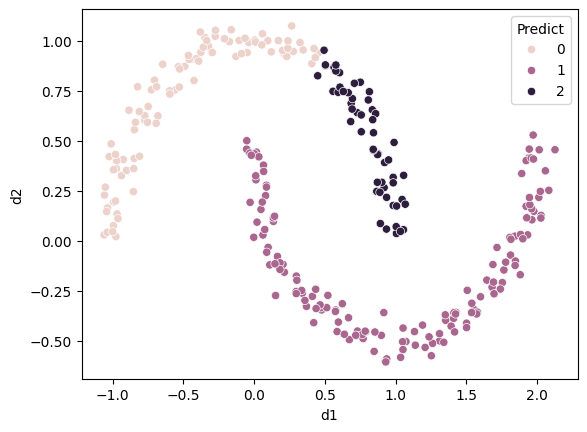

In [91]:
sb.scatterplot(x=ds["d1"],y=ds["d2"],hue=ds["Predict"])
mat.show()